### Numpy basics

In [84]:
import numpy as np
import numpy.random as npr
npr.seed(123)
import matplotlib.pyplot as plt
%matplotlib inline 

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [85]:
m = np.arange(12).reshape((3,4))
print(m)
for i in range(3):
    print("Mean of row number", i,"is",m[i].mean())

for i in range(4):
    print("Mean of row number", i,"is",np.transpose(m)[i].mean())
    
print("Overall mean",m.mean())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Mean of row number 0 is 1.5
Mean of row number 1 is 5.5
Mean of row number 2 is 9.5
Mean of row number 0 is 4.0
Mean of row number 1 is 5.0
Mean of row number 2 is 6.0
Mean of row number 3 is 7.0
Overall mean 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [86]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))




ou1=np.array([[u[i]*v[j] for j in range(4)] for i in range(4)])

print(ou1)

u=u.reshape(4,1)
ou2=u*v

print(ou2)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [87]:
m=np.random.random(60).reshape(10,6)
print(m)


for i in range(len(m)):
    if ((m[i]<0.1).any()):
        m[i]=0
        
print("\n")
print(m)

[[ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897  0.42310646]
 [ 0.9807642   0.68482974  0.4809319   0.39211752  0.34317802  0.72904971]
 [ 0.43857224  0.0596779   0.39804426  0.73799541  0.18249173  0.17545176]
 [ 0.53155137  0.53182759  0.63440096  0.84943179  0.72445532  0.61102351]
 [ 0.72244338  0.32295891  0.36178866  0.22826323  0.29371405  0.63097612]
 [ 0.09210494  0.43370117  0.43086276  0.4936851   0.42583029  0.31226122]
 [ 0.42635131  0.89338916  0.94416002  0.50183668  0.62395295  0.1156184 ]
 [ 0.31728548  0.41482621  0.86630916  0.25045537  0.48303426  0.98555979]
 [ 0.51948512  0.61289453  0.12062867  0.8263408   0.60306013  0.54506801]
 [ 0.34276383  0.30412079  0.41702221  0.68130077  0.87545684  0.51042234]]


[[ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897  0.42310646]
 [ 0.9807642   0.68482974  0.4809319   0.39211752  0.34317802  0.72904971]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.53155137  0.53182

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[ 0.          0.06346652  0.12693304  0.19039955  0.25386607  0.31733259
  0.38079911  0.44426563  0.50773215  0.57119866  0.63466518  0.6981317
  0.76159822  0.82506474  0.88853126  0.95199777  1.01546429  1.07893081
  1.14239733  1.20586385  1.26933037  1.33279688  1.3962634   1.45972992
  1.52319644  1.58666296  1.65012947  1.71359599  1.77706251  1.84052903
  1.90399555  1.96746207  2.03092858  2.0943951   2.15786162  2.22132814
  2.28479466  2.34826118  2.41172769  2.47519421  2.53866073  2.60212725
  2.66559377  2.72906028  2.7925268   2.85599332  2.91945984  2.98292636
  3.04639288  3.10985939  3.17332591  3.23679243  3.30025895  3.36372547
  3.42719199  3.4906585   3.55412502  3.61759154  3.68105806  3.74452458
  3.8079911   3.87145761  3.93492413  3.99839065  4.06185717  4.12532369
  4.1887902   4.25225672  4.31572324  4.37918976  4.44265628  4.5061228
  4.56958931  4.63305583  4.69652235  4.75998887  4.82345539  4.88692191
  4.95038842  5.01385494  5.07732146  5.14078798  5.2

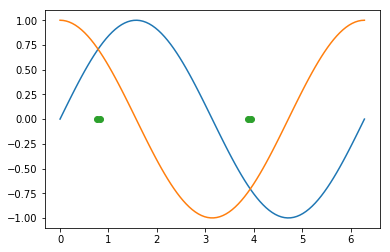

In [88]:
interval=np.linspace(0,2*np.pi,100,True)
print(interval)

refined=interval[::10]
print(refined)

inverted=interval[::-1]
print(inverted)

mask=[(np.absolute(np.sin(interval)-np.cos(interval)))<0.1]
#print(mask)

diff=interval[mask]
print(diff)

s=np.sin(interval)
c=np.cos(interval)
punti=diff*0  #an array of (four) zeroes!
plt.plot(interval,s,interval,c,diff,punti,'o')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [89]:
a=np.arange(1,11)

ma=np.outer(a.reshape(10,1),a)
print(ma)

#trace
tr=np.sum(np.array([ma[i][i] for i in range(len(ma))]))
print(tr)

#antidiagonal
antr=np.array([ma[len(ma)-i-1][i] for i in range(len(ma))])
print(antr)

#offset diagonal
offs=np.array([ma[i][i+1] for i in range(len(ma)-1)])
print(offs)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [90]:
d=[0,198,303,736,871,1175,1475,1544,1913,2448]

savage_grid=np.array([[abs(d[i]-d[j]) for i in range(len(d))] for j in range(len(d))])
print(savage_grid)

print("\n")

civilized_grid=savage_grid*1.609344
print(civilized_grid)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


[[    0.         318.650112   487.631232  1184.477184  1401.738624
   1890.9792    2373.7824    2484.827136  3078.675072  3939.674112]
 [  318.650112     0.         168.98112    865.827072  1083.088512
   1572.329088  2055.132288  2166.177024  2760.02496   3621.024   ]
 [  487.631232   168.98112      0.         696.845952   914.107392
   1403.347968  1886.151168  1997.195904  2591.04384   3452.04288 ]
 [ 1184.477184   865.827072   696.845952     0.         217.26

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Construct a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [108]:
N=100
mask=np.ones(N, dtype=bool) #original sieve

for j in range(2,N):
    i=2
    while i*j<N:
        mask[j*i]=False
        i+=1
        
#print(mask)


prime=np.arange(N)
#print(prime)
#print(prime[mask])

def prime(N):
    mask=np.ones(N, dtype=bool) #original sieve
    mask[0]=False
    mask[1]=False
    for j in range(2,N):
        i=2
        while i*j<N:
            mask[j*i]=False
            i+=1
    prime=np.arange(N)
    return prime[mask]

print(prime(N))

def era(N):
    prime = np.arange(N)
    n = 2
    while n<N**0.5: #it is not necessary for n to go up to N; sqrt(N) is sufficient
        if prime[n]!=0:
            for i in range(n**2,N,n):
                prime[i]=0
        n+=1
    p = [x for x in prime if x!=0 and x!=1]
    return np.array(p)


print(era(N))

%timeit (era(10000))
%timeit (prime(10000))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97]
2.75 ms ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.44 ms ± 57 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a row and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

#Answer

The result is an almost linear behaviour with respect to time; this is exactly what is expected, as

$$
\langle \left( \Delta x \right)^2\rangle = \Delta t
$$

for a brownian motion like the one depicted here.

In [ ]:
walkers = 1000
steps = 2000

walk = np.array([2*np.random.randint(2, size=steps)-1 for i in range(walkers)]) #all walkers, all steps

walk_dist = walk.cumsum(axis=1) #distance of each walker for each time step; cumulative sum

sq_w_d =walk_dist**2 #square distance of each walker at each time step

mean_sq_dist = sq_w_d.mean(axis=0) #mean along the columns (mean at each time step)

st = np.arange(2000)

#some realizations
for i in range(10):
    #realizations
    plt.plot(st, walk_dist[2*i])
    #reference functions
    plt.plot(st, st**0.5, color='black') 
    plt.plot(st, -st**0.5, color='black') 
    plt.plot(st, st, color='black')
    
#average distances
plt.plot(st, mean_sq_dist)




    #the sqrt(step) function can be used as a reference when looking at brownian motion; most realizations lie between 
    #the + and - version of sqrt()
    
    
    
#calculation of the number of points outside the -sqrt,+sqrt interval

fuori = np.array(np.absolute(walk_dist)-np.absolute(st**0.5)>0, dtype=int)
mean = np.mean(fuori, axis=0) 
m = np.mean(mean)
print(m) #initially, all points are outside; not very significant in a 2000 element average
#mean number of steps which are outside the [-sqrt(steps), sqrt(steps)] interval; 
#really close to the expected value, which is 1-0.68=0.32.
      

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

mean 34080.952381
mean 20166.6666667
mean 42400.0
std 20897.9064581
std 16254.5915369
std 3322.50622558
correlations 
 [[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]


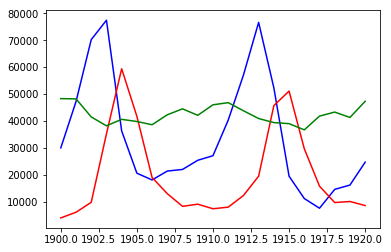

In [135]:
data = np.loadtxt('populations.txt', dtype=float)

year = data[::,0:1:]
hares = data[::,1:2:]
lynxes = data[::,2:3:]
carrots = data[::,3::]

plt.plot(year, hares, color='blue')
plt.plot(year, lynxes, color='red')
plt.plot(year, carrots, color='green')

for function in ['mean','std']:
    for array in [hares,lynxes,carrots]:
        print (function, getattr(np, function)(array))
        
print('correlations','\n',np.corrcoef(np.transpose(data[::,1::])))

mass =     